In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('processed_resumes_work_ADDED_JOB_TITLES.csv')

In [5]:
pd.DataFrame(data.groupby('converted_job_title')['resume_id'].count()).to_csv('temp2.csv')
# pd.DataFrame(data.groupby(['converted_experience_level','converted_job_title'])['resume_id'].count()).to_csv('temp.csv')

In [5]:
data.head(1)

,Unnamed: 0,city,resume_id,container,role,company,location,dates,descript,converted_job_title,converted_experience_level
0,0,atlanta,0004d469fc497102,work-experience-items,senior informix database administrator,Breckinridge Insurance,"Kennesaw, GA",July 2017 to Present,.Informix DBA for Breckinridge Insurance appli...,administrator database,['senior']


In [22]:
word_list = []
for title in data.converted_job_title:
    for word in title.split():
        word_list.append(word)

In [23]:
from collections import Counter
counts = Counter(word_list)
# print(counts)
# Counter({'apple': 3, 'egg': 2, 'banana': 1})

In [26]:
counts.most_common(20)

[('engineer', 152420),
 ('analyst', 86231),
 ('assistant', 85737),
 ('project', 57685),
 ('consultant', 56716),
 ('services', 55060),
 ('sales', 52213),
 ('technical', 51155),
 ('specialist', 50107),
 ('marketing', 39600),
 ('software', 38813),
 ('business', 38145),
 ('operations', 37447),
 ('coordinator', 36689),
 ('associate', 36035),
 ('program', 28454),
 ('support', 27963),
 ('administrator', 27534),
 ('customer', 27151),
 ('representative', 25179)]

In [31]:
data[data.converted_job_title.str.contains('engineer')].converted_job_title.unique()

array(['consultant engineer', 'engineer web', 'devops engineer',
       'engineer software', 'designer engineer web', 'engineer test',
       'electrical engineer project', 'application engineer',
       'engineer java', 'engineer support technical', 'engineer technical',
       'engineer member technical', 'engineer', 'engineer project system',
       'engineer mechanical', 'design engineer project',
       'engineer network project', 'engineer network', 'engineer support',
       'engineer product', 'engineering project', 'engineer logistics',
       'engineer software test', 'automation engineer test',
       'engineer validation', 'engineer system', 'engineer system team',
       'engineer qa', 'automation engineer', 'engineer structural',
       'engineer research', 'engineer software system', 'engineer project',
       'architect engineer software', 'engineering mechanical',
       'construction engineer', 'engineer ux web', 'engineer java ux',
       'engineer java jee', 'bi eng

In [4]:
data.count()
# 575177

Unnamed: 0                    1300592
city                          1300592
resume_id                     1300592
container                     1300592
role                          1300567
company                       1271724
location                       150853
dates                         1293764
descript                      1229127
converted_job_title           1215874
converted_experience_level    1300592
dtype: int64

In [5]:
data.groupby("city").resume_id.count()

city
atlanta    154486
austin      90019
boston     134524
dc         163496
denver     141699
miami      137576
minn       137583
nyc        161275
seattle     84940
sf          94994
Name: resume_id, dtype: int64

In [6]:
# There are only 7139 job descriptions without a date. Let's drop those.
print("Missing dates:", data[data.dates.isnull()].resume_id.count())

# There are only 76,792 job without a description and 1,241,876 with a description. 
# Let's remove them for now
print("Missing description:", data[data.descript.isnull()].resume_id.count())

Missing dates: 6828
Missing description: 71465


In [15]:
# Removed jobs without dates
data = data[~data.dates.isnull()]

# Removed jobs without description
data = data[~data.descript.isnull()]

data = data[~data.converted_job_title.isnull()]

In [8]:
data.loc[data.converted_job_title.isnull()]['converted_job_title'] = 'Unknown'

/Users/kwheatley/anaconda/envs/python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [9]:
# There is one record with an end date after present day.
# Let's update the end date to present day
data.dates.loc[data.dates == 'January 2000 to January 2020'] = 'January 2000 to June 2018'

In [10]:
# Split date information
# If no end date, then use the start date as the end date
# If "Present" for end date, then use June 2018 as the end date
data['from_date'] = data.dates.apply(lambda x: (x.split(" to ")[0]).strip())
data['from_date'] = data.from_date.apply(lambda x: 
                        datetime.datetime.strptime('January ' + x, '%B %Y')
                        if len(x.split(" "))==1
                        else datetime.datetime.strptime(x, '%B %Y'))
data['to_date'] = data.dates.apply(lambda x: (x.split(" to ")[1]).strip()
                        if len(x.split(" to "))>1
                        else x.strip())
data['currently_here'] = 'No'
data.currently_here.loc[data.to_date == 'Present'] = 'Yes'
data.to_date.loc[data.to_date == 'Present'] = 'June 2018'
data['to_date'] = data.to_date.apply(lambda x: 
                        datetime.datetime.strptime('December ' + x, '%B %Y')
                        if len(x.split(" "))==1
                        else datetime.datetime.strptime(x, '%B %Y'))
data['from_year'] = data.from_date.apply(lambda x: str(x.year))
data['to_year'] = data.to_date.apply(lambda x: str(x.year))
data['days_worked'] = (data.to_date - data.from_date).dt.days
data['years_worked'] = round(data.days_worked/365)

/Users/kwheatley/anaconda/envs/python36/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
data.head(1)

,Unnamed: 0,city,resume_id,container,role,company,location,dates,descript,converted_job_title,converted_experience_level,from_date,to_date,currently_here,from_year,to_year,days_worked,years_worked
0,0,atlanta,0004d469fc497102,work-experience-items,senior informix database administrator,Breckinridge Insurance,"Kennesaw, GA",July 2017 to Present,.Informix DBA for Breckinridge Insurance appli...,administrator database,['senior'],2017-07-01,2018-06-01,Yes,2017,2018,335,1.0


In [12]:
def find_next_career(data):
    # Create the next_term_id column
    output = data.sort_values(by=['resume_id','from_date'])\
            .rename(columns={'from_date': 'curr_from_date',
                             'converted_job_title': 'curr_job_title',
                             'converted_experience_level': 'curr_experience_level',
                            })
    output['next_from_date'] = output.groupby(['resume_id'])\
    ['curr_from_date'].shift(-1).fillna("No Record")
    output['next_job_title'] = output.groupby(['resume_id'])\
    ['curr_job_title'].shift(-1).fillna("No Record")
    output['next_experience_level'] = output.groupby(['resume_id'])\
    ['curr_experience_level'].shift(-1).fillna("No Record")
    
    # Print one student example
    one_student = output.groupby(['resume_id'])['role']\
        .count().sort_values(ascending=False).reset_index().head(1).iloc[0][0]
    print("Chaining term to term persistence completed.")
    print("Printing one student example...")
    print("")
    print(output[output['resume_id']==one_student]\
          [['resume_id','role','curr_from_date','next_from_date']]) 
    return output

In [13]:
converted_data = find_next_career(data)

Chaining term to term persistence completed.
Printing one student example...

               resume_id                                               role  \
726726  4879797608ea743b           faculty of natural sciences and pharmacy   
726725  4879797608ea743b                                faculty of medicine   
726724  4879797608ea743b                                rotating internship   
726723  4879797608ea743b                                  surgical resident   
726722  4879797608ea743b                                anesthesia resident   
726718  4879797608ea743b                                    research fellow   
726721  4879797608ea743b                          fellow cardiac anesthesia   
726714  4879797608ea743b                                         lieutenant   
726717  4879797608ea743b                      fellow critical care medicine   
726715  4879797608ea743b                              chief research fellow   
726716  4879797608ea743b                         atte

In [14]:
# converted_data[converted_data.resume_id =='0004d469fc497102'].sort_values(by='dates')

In [15]:
converted_data.head(1)

,Unnamed: 0,city,resume_id,container,role,company,location,dates,descript,curr_job_title,...,curr_from_date,to_date,currently_here,from_year,to_year,days_worked,years_worked,next_from_date,next_job_title,next_experience_level
542532,549809,denver,000062f3e703f51d,work-experience-items,intern co teach ece enhanced,Young English Language,NaN,2003 to 2005,.Kindergarten Teacher 2003-2007 . .Curricul...,co teach,...,2003-01-01,2005-12-01,No,2003,2005,1065,3.0,2003-01-01 00:00:00,co teach,['intern']


In [24]:
converted_data['full_title'] = converted_data.curr_experience_level + ' ' + converted_data.curr_job_title

In [8]:
data.head()

,Unnamed: 0,city,resume_id,container,role,company,location,dates,descript,converted_job_title,converted_experience_level
0,0,atlanta,0004d469fc497102,work-experience-items,senior informix database administrator,Breckinridge Insurance,"Kennesaw, GA",July 2017 to Present,.Informix DBA for Breckinridge Insurance appli...,administrator database,['senior']
1,1,atlanta,0004d469fc497102,work-experience-items,senior informix dba database administrator,INTERCALL Inc,NaN,January 2007 to June 2017,.Informix Database Administor for InterCall's ...,administrator database dba,['senior']
2,2,atlanta,0004d469fc497102,work-experience-items,oracle informix dba database administrator,Accenture/Bellsouth Telecommuncations Inc,NaN,March 2004 to December 2007,.Oracle Database for OPEDS production support....,administrator database oracle,[]
3,3,atlanta,0004d469fc497102,work-experience-items,peoplesoft hrms oracle dba database administrator,ACENTRON/Michelin Inc,NaN,March 2003 to February 2004,.Responsible for Migrating objects and Project...,administrator database oracle,[]
4,4,atlanta,0004d469fc497102,work-experience-items,informix oracle database administrator,BellSouth Telecommunications INC,NaN,November 1998 to January 2003,.Worked on various projects for BellSouth. Wor...,administrator database oracle,[]


In [120]:
nodes = list(converted_data.curr_job_title.unique())
edges = list(zip(converted_data.curr_job_title.tolist(), converted_data.next_job_title.tolist()))

In [132]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

In [127]:
print("nodes:", G.number_of_nodes())
print("edges:", G.number_of_edges())

nodes: 20011
edges: 406632


In [128]:
import matplotlib.pyplot as plt

/Users/kwheatley/anaconda/envs/python36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/kwheatley/anaconda/envs/python36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/kwheatley/anaconda/envs/python36/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/kwheatley/anaconda/envs/python36/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hol

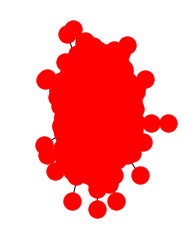

In [134]:
# G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=False, font_weight='bold')
# plt.subplot(122)
# nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.show()

In [279]:
# There appear to be jobs with a start date after current date (June 10, 2018)
# Let's remove them from the dataset
print("Records with start date after current date:",
      data[data.from_date > '2018-06-10'].resume_id.count())
data = data[data.from_date <= '2018-06-10']

Records with start date after current date: 157


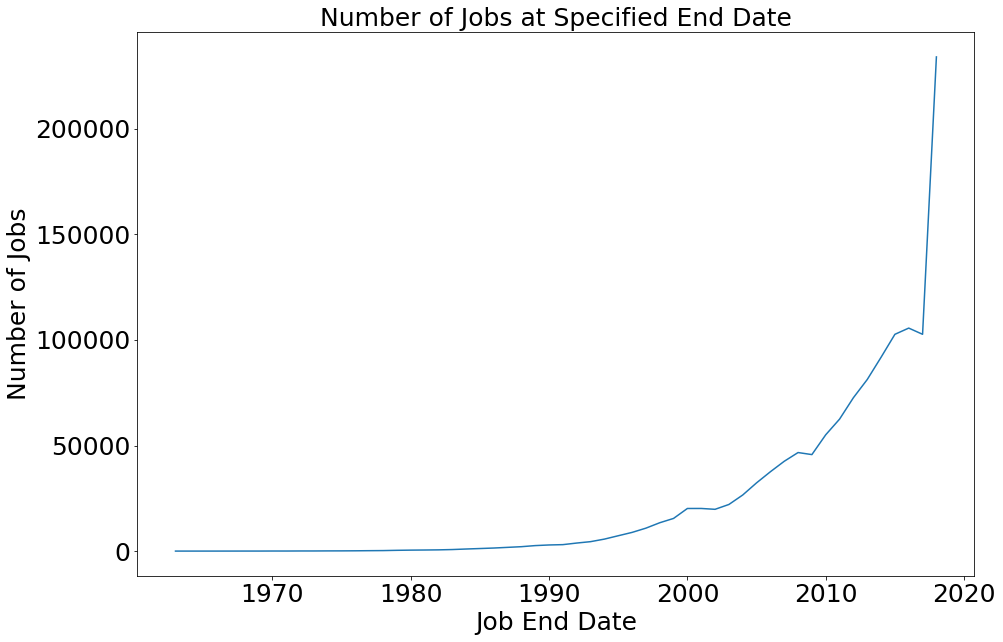

In [33]:
temp_data = pd.DataFrame(data.groupby(['to_year'])['resume_id'].count().reset_index())
plt.figure(figsize=(15,10))
plt.plot(temp_data.to_year, temp_data.resume_id)
plt.title('Count of Comments By Date')
plt.xlabel('Job End Date',fontsize=25)
plt.ylabel('Number of Jobs',fontsize=25)
plt.title('Number of Jobs at Specified End Date',fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

In [26]:
temp_data.sort_values(by='to_year', ascending=False).head()

,to_year,resume_id
55,2018,234042
54,2017,102672
53,2016,105613
52,2015,102664
51,2014,91795


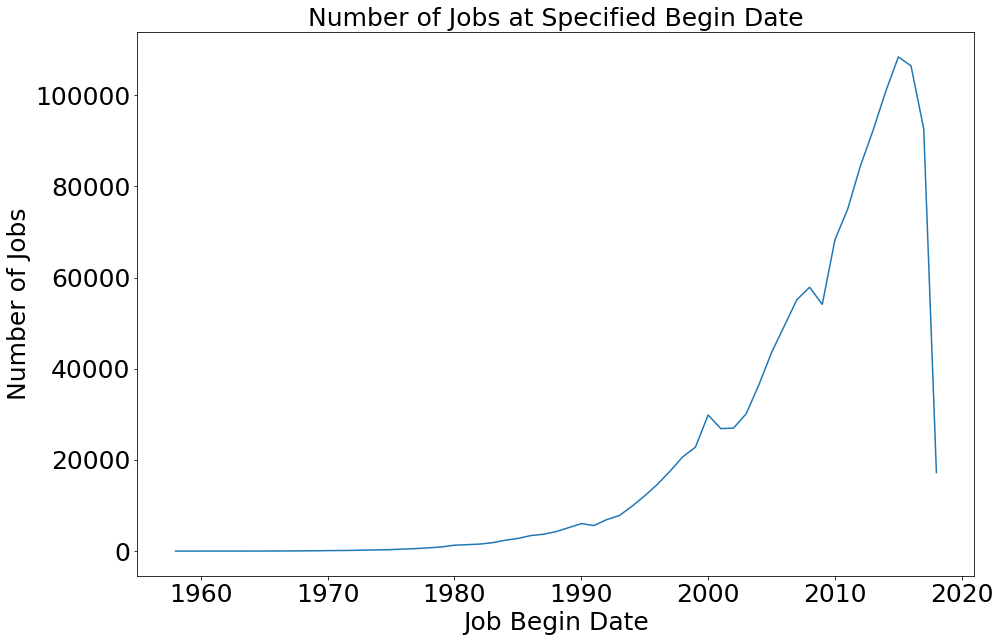

In [32]:
temp_data = pd.DataFrame(data.groupby(['from_year'])['resume_id'].count().reset_index())
plt.figure(figsize=(15,10))
plt.plot(temp_data.from_year, temp_data.resume_id)
plt.title('Count of Comments By Date')
plt.xlabel('Job Begin Date',fontsize=25)
plt.ylabel('Number of Jobs',fontsize=25)
plt.title('Number of Jobs at Specified Begin Date',fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

In [28]:
temp_data.sort_values(by='from_year', ascending=False).head()

,from_year,resume_id
58,2018,17236
57,2017,92612
56,2016,106419
55,2015,108391
54,2014,100795


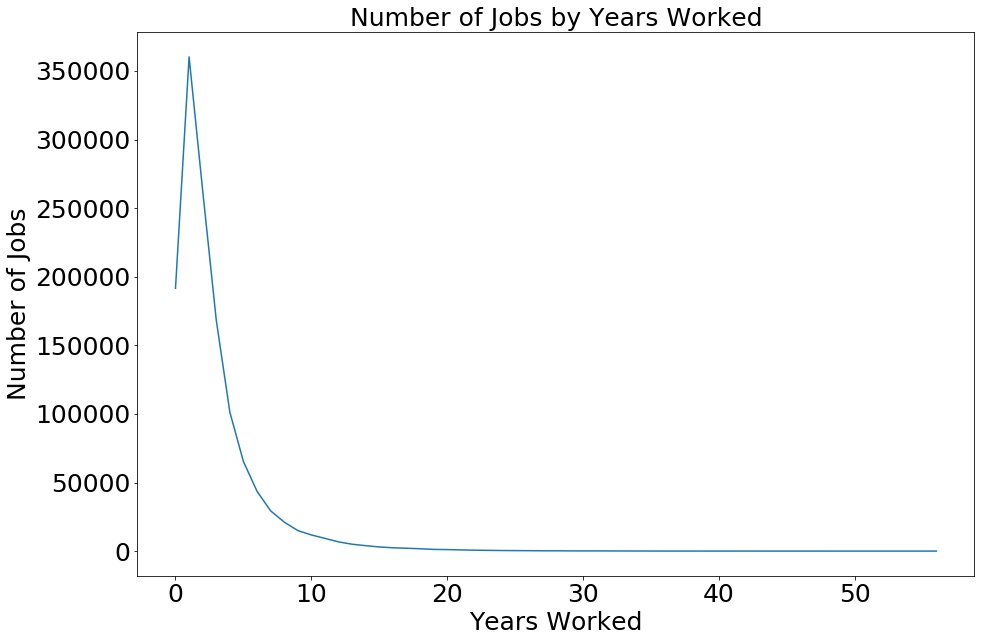

In [29]:
temp_data = pd.DataFrame(data.groupby(['years_worked'])['resume_id'].count().reset_index())
plt.figure(figsize=(15,10))
plt.plot(temp_data.years_worked, temp_data.resume_id)
plt.xlabel('Years Worked',fontsize=25)
plt.ylabel('Number of Jobs',fontsize=25)
plt.title('Number of Jobs by Years Worked',fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

In [30]:
temp_data.sort_values(by='resume_id', ascending=False).head()

,years_worked,resume_id
1,1.0,360239
2,2.0,262843
0,0.0,191562
3,3.0,168359
4,4.0,101300


In [32]:
# Does education generally have dates?

In [1]:
converted_data.columns

NameError: name 'converted_data' is not defined

In [282]:
converted_data.columns = ['row_index', 'city', 'resume_id', 'container', 'role', 'company',
       'location', 'dates', 'descript', 'curr_job_title',
       'curr_experience_level', 'curr_from_date', 'to_date', 'currently_here',
       'from_year', 'to_year', 'days_worked', 'years_worked', 'next_from_date',
       'next_job_title', 'next_experience_level']

In [327]:
# converted_data.row_index = converted_data.row_index.astype(str)
converted_data.descript = converted_data.descript.str.strip()

In [333]:
converted_data.count()

row_index                1223617
city                     1223617
resume_id                1223617
container                1223617
role                     1223600
company                  1199134
location                  143785
dates                    1223617
descript                 1223617
curr_job_title           1145592
curr_experience_level    1223617
curr_from_date           1223617
to_date                  1223617
currently_here           1223617
from_year                1223617
to_year                  1223617
days_worked              1223617
years_worked             1223617
next_from_date           1223617
next_job_title           1223617
next_experience_level    1223617
document                 1145592
file                     1223617
dtype: int64

In [334]:
# converted_data.groupby('descript').resume_id.count().sort_values(ascending=False)

In [320]:
converted_data.iloc[59997]

row_index                                                           253994
city                                                                boston
resume_id                                                 0b33fc18b97cabb9
container                                            work-experience-items
role                                                   patient coordinator
company                                    INDEPENDENT DOCTOR OF OPTOMETRY
location                                                               NaN
dates                                       December 2004 to November 2005
descript                 .Assistant Office Manager .* Expertly screened...
curr_job_title                                         coordinator patient
curr_experience_level                                                   []
curr_from_date                                         2004-12-01 00:00:00
to_date                                                2005-11-01 00:00:00
currently_here           

In [315]:
for i in corpus:
    if not i:
        print(i)

In [346]:
converted_data['document'] = converted_data.curr_job_title.fillna("") + ' ' + \
                             converted_data.role.fillna("") + ' ' + \
                             converted_data.descript.fillna("")
# converted_data['file'] = converted_data.resume_id + '-' + converted_data.row_index
# # corpus = list()

In [355]:
corpus = list(converted_data['document'].values)
files = list(converted_data['file'].values)

In [347]:
len(files)

1223617

In [396]:
# data_to_save.columns = ['text']
data_to_save.to_csv("data.csv",index=False)

In [393]:
data_to_save.values.tolist()
# .to_csv("data.csv")

[['co teach intern co teach ece enhanced .Kindergarten Teacher    2003-2007\xa0.\xa0.Curriculum and Instruction\xa0.● Collaboratively planned and implemented appropriate grade level instruction in all content areas including\xa0.implementation of a new curriculum implementation and Colorado State Standards\xa0.● Created a socially constructive learning environment using responsive classroom guidelines\xa0.\xa0.Operational Management\xa0.● Facilitated weekly team meetings and attended all school wide leadership meetings\xa0.\xa0.School Culture, Equity, &amp;amp; Community Engagement\xa0.● Provided students with equitable instructional opportunities.'],
 ["adjunct instructor adjunct instructor education .Classes taught: Curriculum and Development, Children's Literature, ECE Practicum, Creativity and the Young Child, and Administration of ECE\xa0.\xa0.Curriculum and Instruction\xa0.● Provide quality instruction for future educators."],
 ['administrator support support staff and administra

In [368]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2), min_df = 0, stop_words = 'english')
tfidf_matrix =  tf.fit_transform(files, corpus)

/Users/kwheatley/anaconda/envs/python36/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [369]:
from sklearn.metrics.pairwise import linear_kernel

def find_similar(tfidf_matrix, index, top_n = 10):
    cosine_similarities = linear_kernel(tfidf_matrix[index:index+1], tfidf_matrix).flatten()
    related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != index]
    return [(index, cosine_similarities[index]) for index in related_docs_indices][0:top_n]

In [370]:
corpus[60001]
# files[59996]
# converted_data[converted_data.file == '0b33fc18b97cabb9-253995']

'creative head creative lead and head illustrator .Using and translating the full set of bus etiquette and rules provided by the Spokane Transit into over 20 large format posters for buses, bus stations and the plaza, displayed for the year of 2016..'

In [371]:
for index, score in find_similar(tfidf_matrix, 60000):
    print(index, score, corpus[index])
    print()

59996 0.2859744279858837  day porter .Night Supervisor .*  Successfully trained and managed all employees in office cleaning procedures. .* Worked alongside the engineer to maintain the upkeep of the building. .* Supervised a total of 8 employees at night to ensure that all nightly duties were completed..

59998 0.2859744279858837 customer representative services customer service representative .* Successfully explained proxy material for shareholders of various funds such as American funds, Mainstay, Sun America, Piedmont, etc. .* Address shareholder as requested by particular fund. .* Used several directories in order to find current contact information for shareholders .* Strove to maintain a high close ratio for group productivity. .* Proactively assisted shareholder on how to convert shares from reorganized stock to an acquired stock..

59999 0.2859744279858837 technical technical liaison .* Keep up-to-date with the latest OS, QA software available. .* Interact with Customers on a

In [374]:
from gensim.models.Doc2Vec import Doc2Vec
# model= Word2Vec()
# model.build_vocab_from_freq({"Word1": 15, "Word2": 20})

ModuleNotFoundError: No module named 'gensim.models.Doc2Vec'

In [373]:
model = Doc2Vec(documents, size=100, window=8, min_count=5, workers=4)

NameError: name 'Doc2Vec' is not defined